In [ ]:
import pandas as pd

# Load both tables
players_df = pd.read_csv("players.csv")
teams_df = pd.read_csv("teams.csv")

# Display the first few rows
print(players_df.head())
print(teams_df.head())


       ID            Name            FullName  Age  Height  Weight  \
0  158023        L. Messi        Lionel Messi   35     169      67   
1  165153      K. Benzema       Karim Benzema   34     185      81   
2  188545  R. Lewandowski  Robert Lewandowski   33     185      81   
3  192985    K. De Bruyne     Kevin De Bruyne   31     181      70   
4  231747       K. Mbappé       Kylian Mbappé   23     182      73   

                                           PhotoUrl Nationality  Overall  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   Argentina       91   
1  https://cdn.sofifa.net/players/165/153/23_60.png      France       91   
2  https://cdn.sofifa.net/players/188/545/23_60.png      Poland       91   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium       91   
4  https://cdn.sofifa.net/players/231/747/23_60.png      France       91   

   Potential  ...  LMRating  CMRating  RMRating LWBRating CDMRating RWBRating  \
0         91  ...        91        88    

In [5]:
# Data Cleaning & Data Preprocessing

#1.Check for missing values
print(players_df.isnull().sum())
print(teams_df.isnull().sum())

# 2.Drop rows with too many missing values
players_df = players_df.dropna(subset=["Overall", "Potential"])

# 3.Convert numerical columns to correct types
players_df["Age"] = players_df["Age"].astype(int)




NameError: name 'players_df' is not defined

In [3]:
# 4.Fill missing values correctly
players_df = players_df.assign(
    ClubNumber=players_df['ClubNumber'].fillna(0),
    ContractUntil=players_df['ContractUntil'].fillna('Unknown').astype(str),
    ClubPosition=players_df['ClubPosition'].fillna('Unknown')
)


NameError: name 'players_df' is not defined

In [ ]:
#5.Inspect unique values in 'ContractUntil' column
print(players_df['ContractUntil'].unique())

# Convert 'ContractUntil' to datetime with explicit format (if format is known)
players_df['ContractUntil'] = pd.to_datetime(players_df['ContractUntil'], format='%Y-%m-%d', errors='coerce')


<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]


In [6]:
# Data Analysis & Visualization Methods

#1.Top 10 Teams Based on Average Player Rating

top_teams = players_df.groupby("Club")["Overall"].mean().sort_values(ascending=False).head(10)
print(top_teams)
#Bar Chart for Top Teams
plt.figure(figsize=(12, 6))
sns.barplot(x=top_teams.index, y=top_teams.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Teams Based on Average Player Rating")
plt.xlabel("Team")
plt.ylabel("Average Rating")
plt.show()


NameError: name 'players_df' is not defined

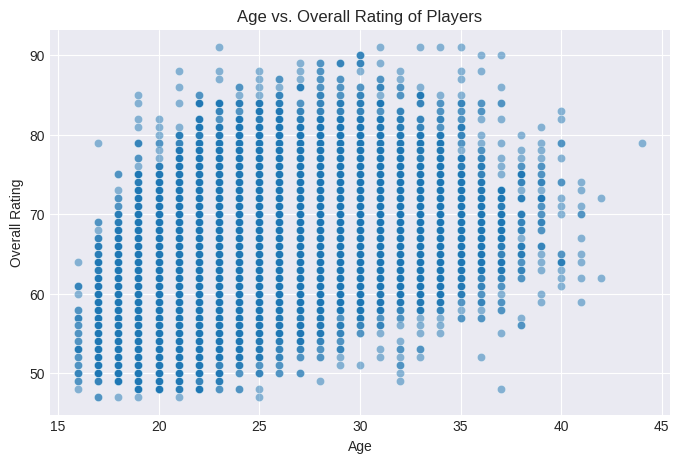

In [ ]:
#2.Correlation Between Age & Player Rating

plt.figure(figsize=(8,5))
sns.scatterplot(x=players_df["Age"], y=players_df["Overall"], alpha=0.5)
plt.title("Age vs. Overall Rating of Players")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()


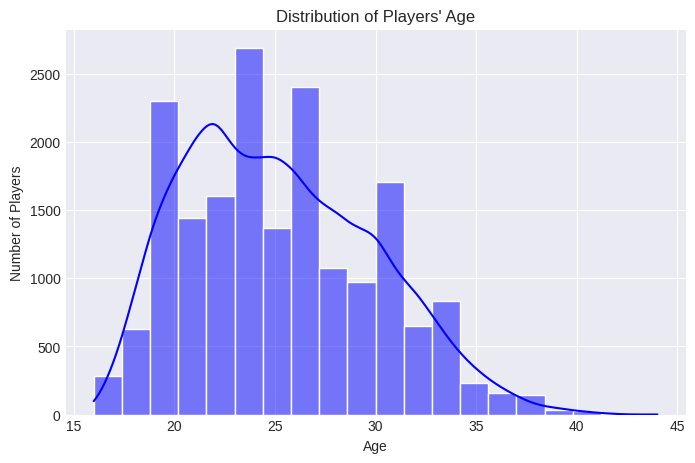

In [ ]:
 #3.Player Age Distribution

plt.figure(figsize=(8, 5))
sns.histplot(players_df["Age"], bins=20, kde=True, color="blue")
plt.title("Distribution of Players' Age")
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.show()


<ipython-input-28-bd7c8b2e5193>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")


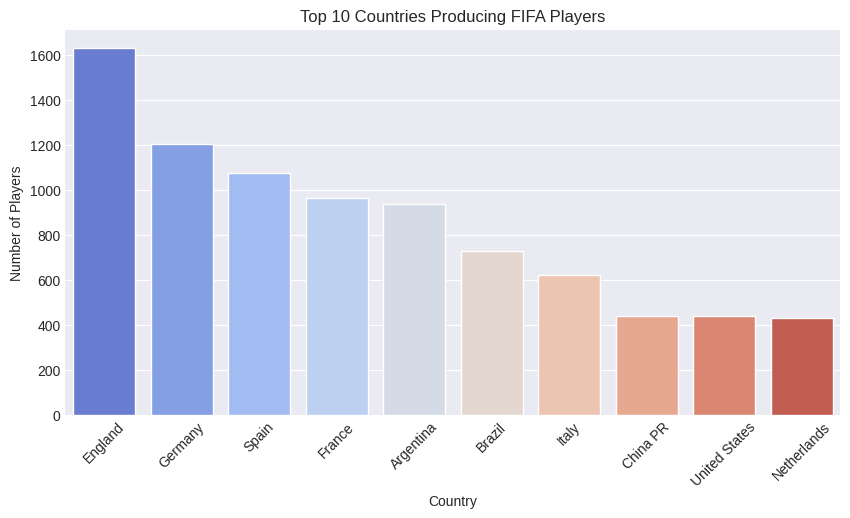

In [ ]:
#4.Top 10 Countries Producing FIFA Players

top_countries = players_df["Nationality"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Countries Producing FIFA Players")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.show()


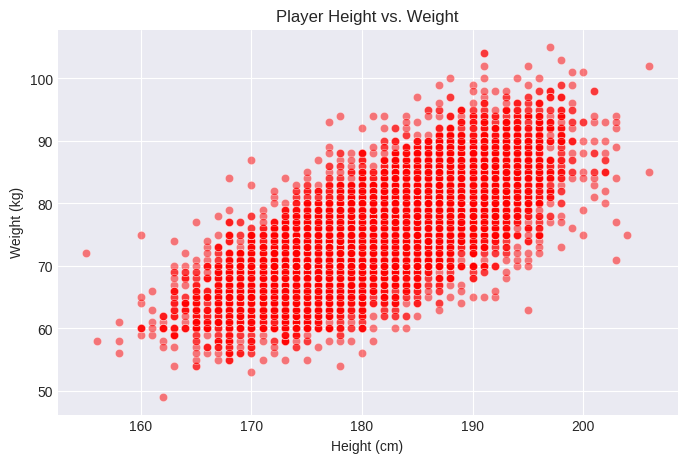

In [ ]:
#5.Player Height vs. Weight Scatter Plot

plt.figure(figsize=(8,5))
sns.scatterplot(x=players_df["Height"], y=players_df["Weight"], alpha=0.5, color="red")
plt.title("Player Height vs. Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()
